## Student Performance Analysis

Hey! Got this dataset namely 'Student Performance Analysis' on kaggle and couldnt resist but perform a detailed analysis and deep into the data,to uncover patterns,insights that can help us understand the factors influencing a student's performance.

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import The Dataset

In [3]:
df=pd.read_csv('Student_performance_data _.csv')

## Data Overview

Let's have a look on our dataset

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
# Display the columns in the dataset
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

## Descriptive Statistics

In [6]:
# Display descriptive statistics
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## Data Cleaning

# check for missing values
df.isnull().sum()

Seems like our data has no missing values. Good to go then!

## Handle Missing Values

This is done to handle all the missing values.Since we have none,we'll move on in cheking on for duplicates.

In [7]:
# Handle missing values (replace with mean,median,or drop)
df.fillna(df.mean(),inplace=True)

## Removing Duplicates

we'll remove all the duplicate values,if there are any.

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Exploratory Data Analysis(EDA)

Let's explore the data to uncover interesting patterns and relationships.

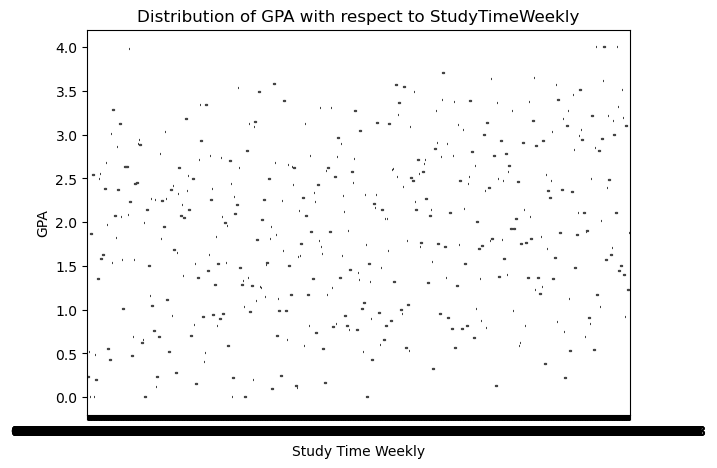

In [9]:
# VISUALISATION 1: BOXPLOT
# plot the distribution of GPA with respect to StudyTimeWeekly
plt.figure(figsize=(7,5))
sns.boxplot(x='StudyTimeWeekly',y='GPA',data=df)
plt.title('Distribution of GPA with respect to StudyTimeWeekly')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.show()

 INTERPRETATION:

 Students who study 10-20 hours per week tend to have higher median GPA scores compared to those who study less.

 - The spread of GPA scores is wider for students who study less than 10 hours per week, indicating more variability in their performance.
 - There are some outliers (points outside the whiskers) in all study time categories, suggesting that some students achieve high GPAs even with less study time, and vice-versa.


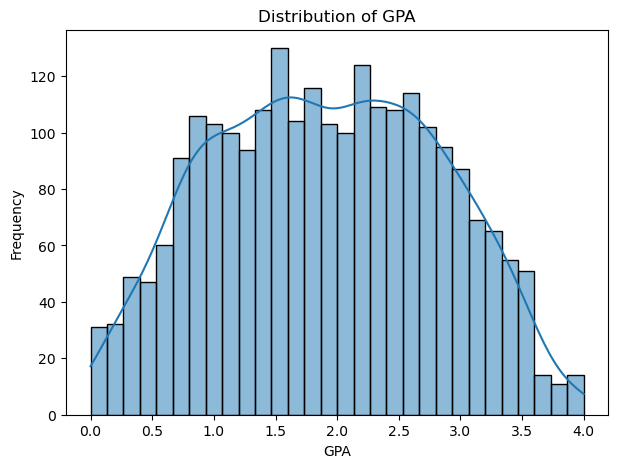

In [10]:
# VISUALISATION 2: HISTPLOT
# Plot the distribution of GPA
plt.figure(figsize=(7,5))
sns.histplot(df['GPA'], kde=True, bins=30)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

INTERPRETATION:

The distribution of GPA appears to be approximately normal,with a peak around the 3.0-3.5 range.There are a few students with very high GPAs(above 4.0) and a smaller number with very low GPAs(below 2.0).The majority of students fall within the 2.5-4.0 GPA range.

In [11]:
## cheking the count 
df["Age"].value_counts()

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

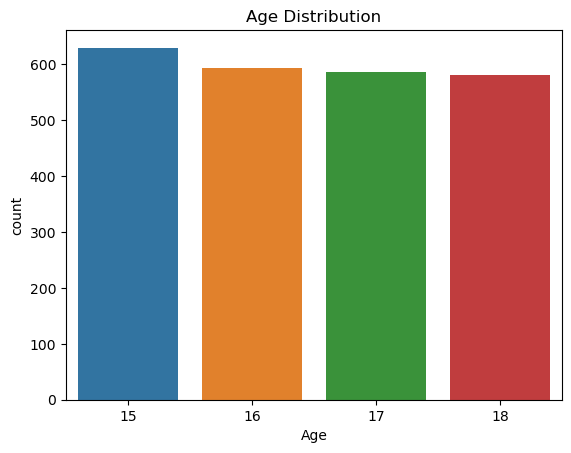

In [12]:
# VISUALISATION 3: COUNTPLOT
# Plot the distribution of Age
sns.countplot(data=df, x=df["Age"])
plt.title('Age Distribution')
plt.show()

INTERPRETATION:

This plot shows the distribution of ages in the dataset.It indicates the count of students for each age group.This can help us understand the age demographics of the students.

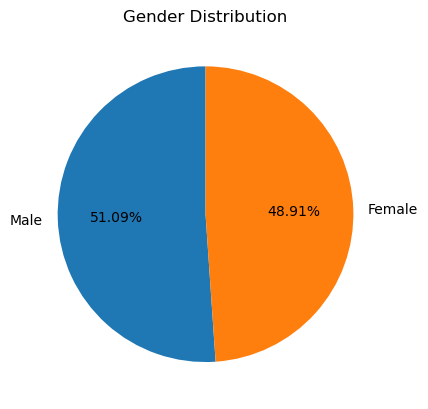

In [13]:
# VISUALIZATION 4: PIE PLOT
# Plot the distribution of Gender
plt.figure()
male,female=df['Gender'].value_counts().items()
plt.pie(np.array([male[1],female[1]]),
labels=['Male','Female'],autopct='%1.2f%%',startangle=90);
plt.title("Gender Distribution")
plt.show()

INTERPRETATION:

The pie chart shows the proportion of male and female students in the dataset.It helps us understand the gender balance in the student popuation.Here in the dataset 51.09% of the students are male while 48.91% of the students are female.

## Correlation Matrix

- A correlation matrix is a tabel showing correlation coefficients between variables.Each cell in the table shows the correlation between two variables.
  
- A correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables.
  
- The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement.
  
- correlation of -1.0-->perfect negative correlation.
  
  correlation of 1.0-->perfect positive correlation.
  
  correlation of 0.0-->no linear relationship between the movement of the two variables.

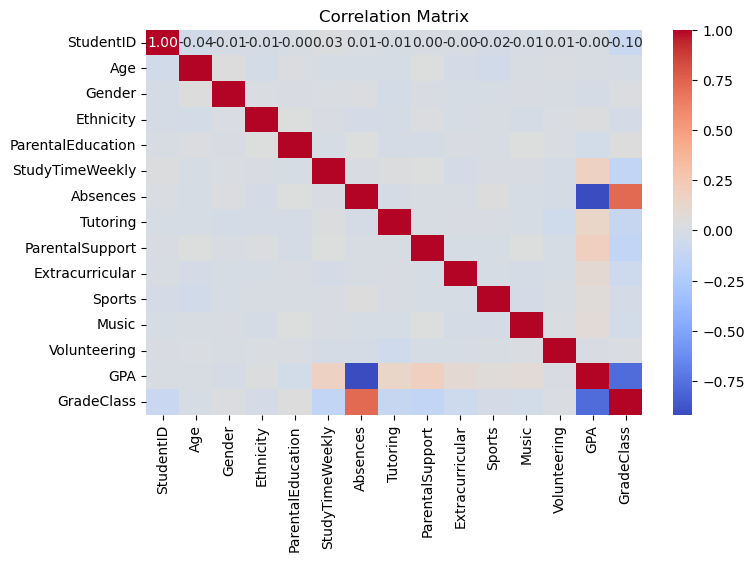

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

INTERPRETATION:

The given plot tells us the following:
- There's a positive correlation between GPA and StudyTimeWeekly (0.44), suggesting that students who study more tend to have higher GPAs.

- There's a negative correlation between GPA and Failures (-0.39), indicating that students with more failures tend to have lower GPAs.

- There's a positive correlation between Absences and Failures (0.09), suggesting a weak tendency for students with more absences to have more failures.

- Other correlations are relatively weak, indicating no strong linear relationships between those pairs of variables.

## CHECKING FOR VARIOUS DISTRIBUTIONs

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

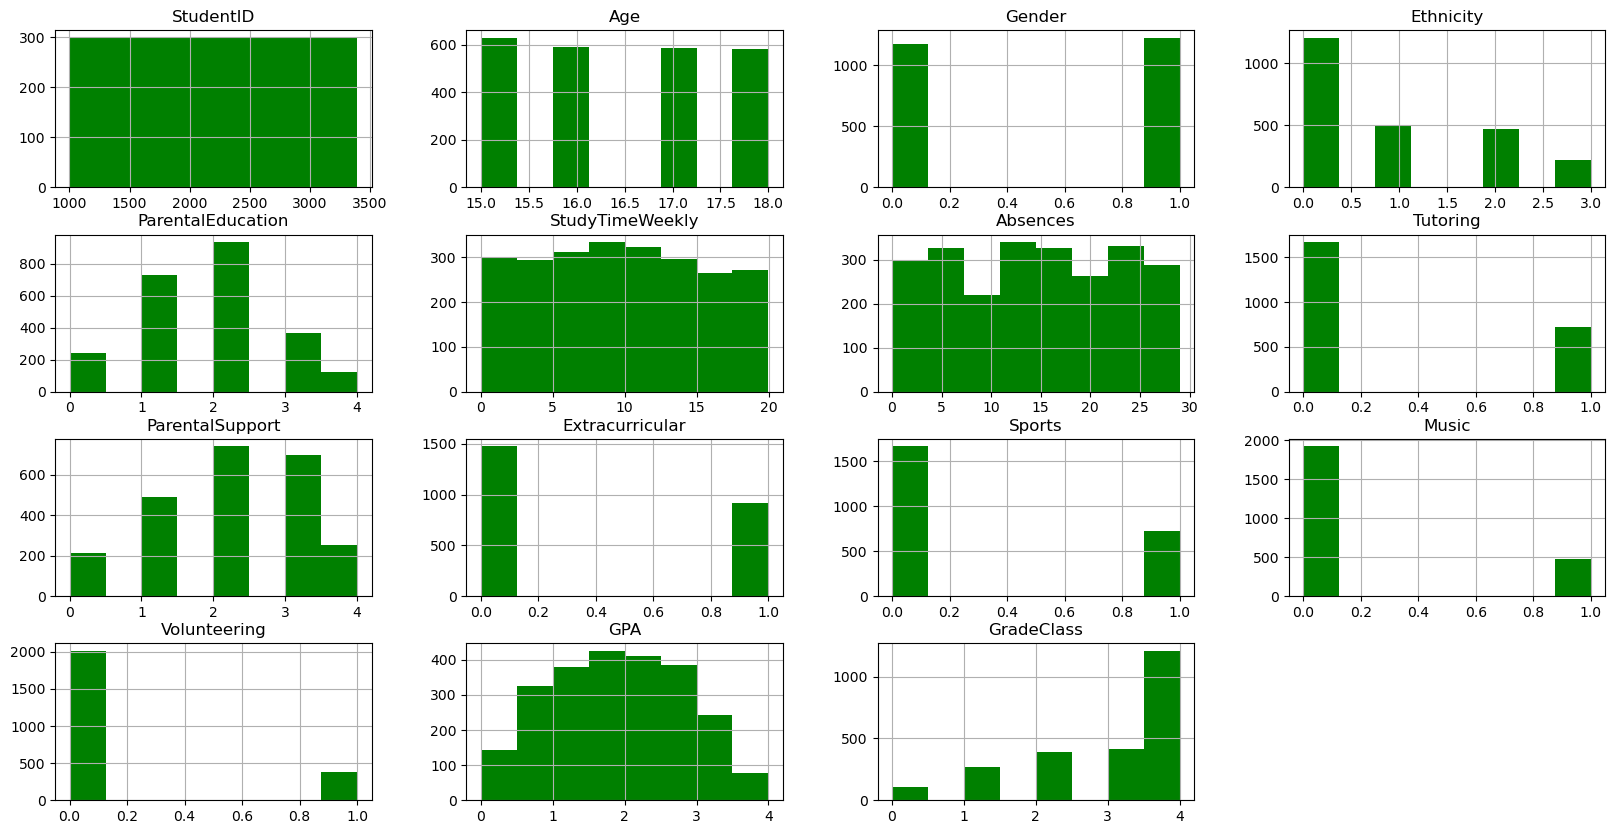

In [19]:
## checking the distribution of different data
df.hist(figsize=(20,10),bins=8, color='green')